In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Observation:
We are importing three essential Python libraries for EDA:
- pandas: for data handling
- matplotlib.pyplot and seaborn: for creating visualizations


In [2]:
df = pd.read_csv("train.csv")


### Observation:
The Titanic dataset has been successfully loaded from the file "train.csv" into a pandas DataFrame called `df`.


In [3]:
print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())
print("\nSummary statistics:")
print(df.describe(include='all'))

Shape of dataset: (891, 12)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique   

### Observation:
- The dataset contains 891 rows and 12 columns.
- Columns like `Age`, `Cabin`, and `Embarked` have missing values.
- Most passengers traveled in 3rd class (`Pclass = 3`).
- Several columns are categorical (e.g., Name, Sex, Embarked).


In [4]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Observation:
- `Age` has 177 missing values.
- `Cabin` has a large number of missing values (687).
- `Embarked` has 2 missing values.
- These columns may need to be cleaned or handled before modeling.


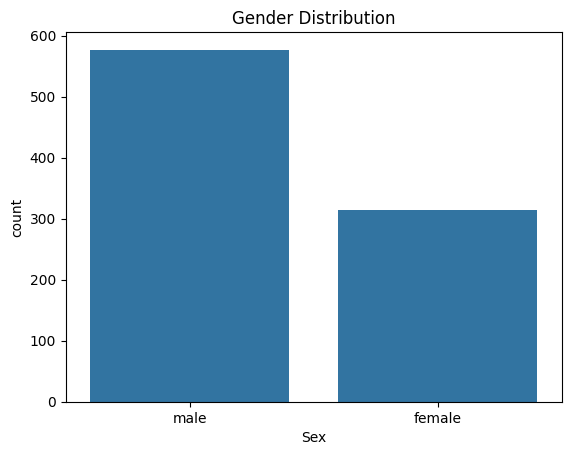

In [5]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()


### Observation:
There were more male passengers than female on the Titanic. This gender imbalance may affect survival analysis.


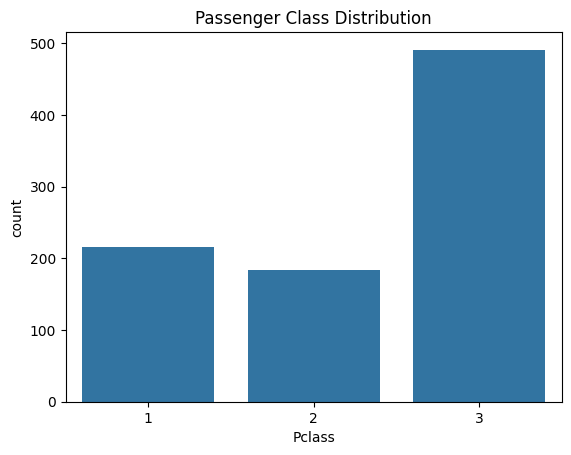

In [6]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()


### Observation:
Most passengers were in 3rd class, followed by 1st and 2nd. This shows a majority of low-fare travelers.


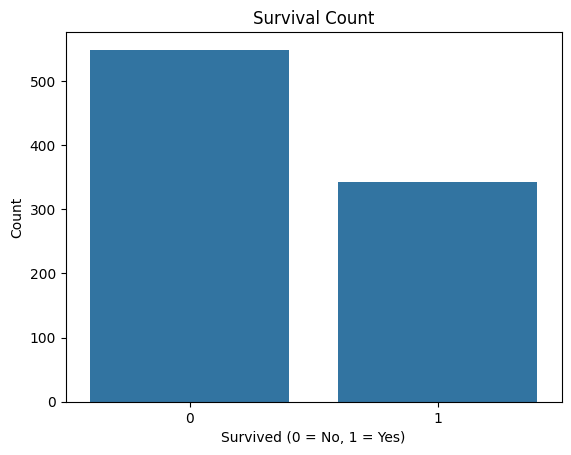

In [8]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()




### Observation:
The dataset shows that more passengers did not survive than those who did. The number of non-survivors (0) is higher than survivors (1).




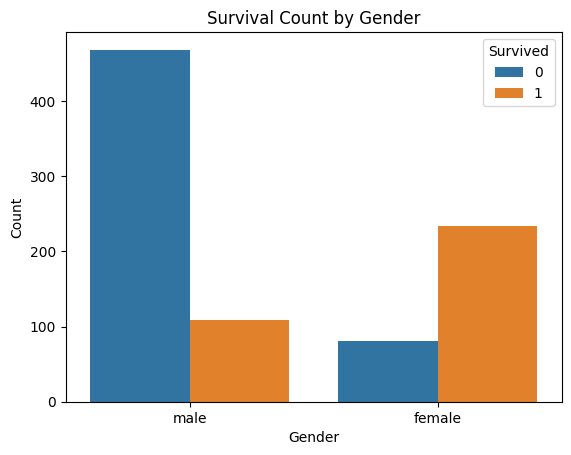

In [9]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()


### Observation:

Females had a much higher survival rate than males. Most male passengers did not survive, while most female passengers did.


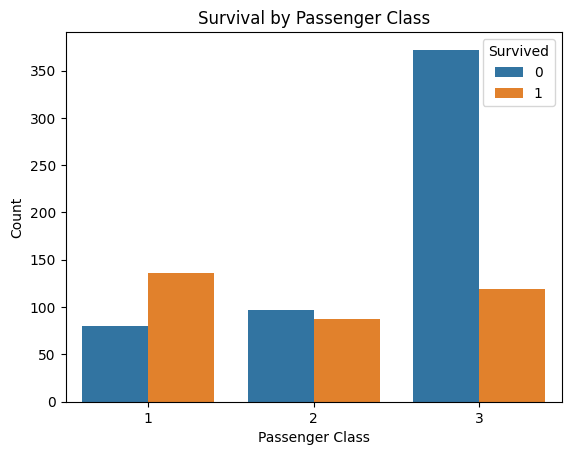

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()


### Observation:
First-class passengers had a higher survival rate compared to second and third class. Passengers in third class had the lowest survival rate.


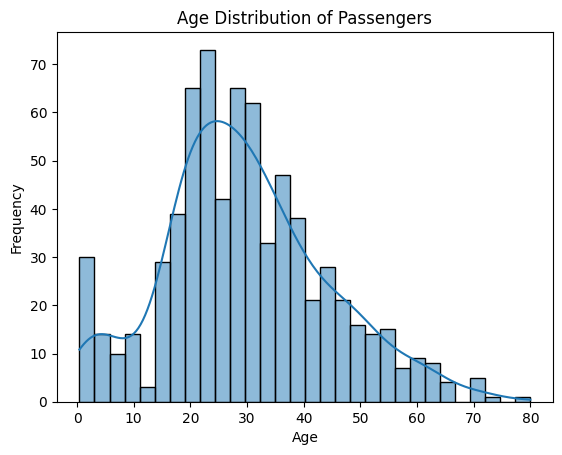

In [11]:
sns.histplot(data=df, x='Age', kde=True, bins=30)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### Observation:
Most passengers were between 20 and 40 years old. There were also many children under 10 and some elderly passengers.


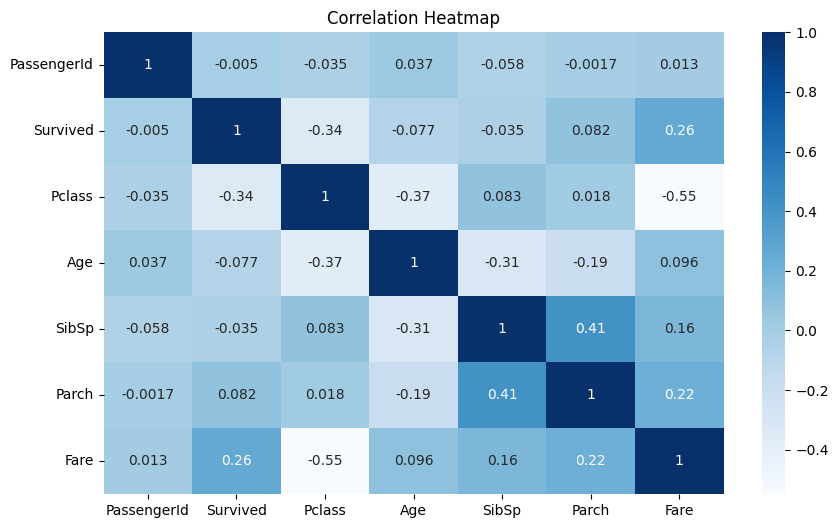

In [15]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now draw the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()



### Observation:

The correlation heatmap shows that survival has a positive correlation with fare and a negative correlation with being in third class. Age and number of siblings/spouses show weak correlations.


### 📊 Summary of Findings:

- The majority of passengers were male and in 3rd class.
- Most passengers were aged between 20 to 40 years.
- There were more people who died than survived.
- Females had a higher survival rate than males.
- Passengers in 1st class had better chances of survival.
- Missing values are present in the `Age`, `Cabin`, and `Embarked` columns.
- `Pclass`, `Sex`, and `Fare` appear to be related to survival.
